In [ ]:
import pandas as reviews_of_lap_1
from sklearn.feature_extraction.text import TfidfVectorizer as reviews_of_laptd
from imblearn.over_sampling import SMOTE as reviews_of_lapsy
from collections import Counter as reviews_of_lapct
from sklearn.model_selection import train_test_split as reviews_of_lapnp
from sklearn.metrics import confusion_matrix as reviews_of_lapm
from sklearn.metrics import ConfusionMatrixDisplay as reviews_of_lapdi
from sklearn.metrics import precision_score as reviews_of_lap1
from sklearn.metrics import recall_score as reviews_of_lap2
from sklearn.metrics import accuracy_score as reviews_of_lap3
from sklearn.metrics import f1_score as reviews_of_lap4
from sklearn.tree import DecisionTreeClassifier as reviews_of_lapd
from sklearn.ensemble import RandomForestClassifier as reviews_of_laprd
from sklearn.ensemble import AdaBoostClassifier as reviews_of_lapabs
from sklearn.ensemble import GradientBoostingClassifier as reviews_of_lapgd

reviews_of_lap = reviews_of_lap_1.read_csv('Cleansed_laptop data.csv')
reviews_of_lap['rating'].unique()

array([5., 4., 3., 2., 1.])

In [ ]:
reviews_of_lap['rating']=reviews_of_lap['rating'].replace({1:0,2:0,3:0,4:1,5:1})
reviews_of_lap['rating'].value_counts()

rating
0.0    230
1.0    169
Name: count, dtype: int64

*** Replaced ratings  1,2,3=0 ; 4,5=1

In [ ]:
import nltk as reviews_of_lapnt
reviews_of_lapnt.download('stopwords')
import regex as reviews_of_lapex
from nltk.corpus import stopwords as reviews_of_lapsw
reviews_of_lapsw_En = reviews_of_lapsw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.porter import PorterStemmer as reviews_of_lappt
reviews_of_lappt_St = reviews_of_lappt()

In [ ]:
def rew_lp(lp):
    lp = lp.lower()
    lp = reviews_of_lapex.sub("[^a-z]+", " ", lp)
    lp = " ".join([g for g in lp.split() if get_ipython not in reviews_of_lapsw_En])
    lp=' '.join([reviews_of_lappt_St.stem(g) for g in lp.split()])
    return lp

In [ ]:
lp_R=[]
for rd in reviews_of_lap['comment']:
    lp_R.append(rew_lp(rd))
lp_R[:30]

['even though the laptop doesn t have backlight keyboard it perform is veri good veri fast boot and shut down screen clariti and sound clariti are also good',
 'awesom display with good perform',
 'laptop perform is ok especi avail of genuin window and ms offic home edit along with bunch of other softwar preload onli you have to partit the ssd into local drive at your end to keep program file in c drive otherwis it is fast better perform in th gener i processor from th gener i heat issu is there in all dell laptop includ thi one so i will wait for next month to check whether thi heat issu creat ani problem in perform of laptop in summer dell shall arrang to direct blower not toward the screen as in present case in my opinion the the heat come from blower toward the screen may reduc or impact screen due to heat blow laptop also heat from below so i don t think it is advis to keep it on lap leg better to oper on tabl or some platform',
 'perform good veri fast but charg it s veri heat on

In [ ]:
reviews_of_lap['comment']=lp_R
reviews_of_lap

,comment,rating
0,even though the laptop doesn t have backlight ...,1.0
1,awesom display with good perform,1.0
2,laptop perform is ok especi avail of genuin wi...,1.0
3,perform good veri fast but charg it s veri hea...,1.0
4,i like lightweight look perform is medium till...,0.0
...,...,...
394,heat issu youtub video are play in lag camera ...,0.0
395,don t buy thi product if u need backlit in key...,0.0
396,have been use thi laptop for a month now somet...,0.0
397,face recognit and fingerprint is not work and ...,0.0


In [ ]:
reviews_of_lapanl = reviews_of_laptd(analyzer='word')
reviews_of_lap_x = reviews_of_lapanl.fit_transform(reviews_of_lap['comment'].values.astype('U')).toarray()

In [ ]:
reviews_of_lap_y = reviews_of_lap['rating']
reviews_of_lap_x.shape

(399, 1248)

In [ ]:
print('Original reviews_of_lap datashape %s' % reviews_of_lapct(reviews_of_lap_y))
reviews_of_lapM = reviews_of_lapsy()
reviews_of_lap_x, reviews_of_lap_y = reviews_of_lapM.fit_resample(reviews_of_lap_x, reviews_of_lap_y)
print('Resampled reviews_of_lap datashape %s' % reviews_of_lapct(reviews_of_lap_y))

Original reviews_of_lap datashape Counter({0.0: 230, 1.0: 169})
Resampled reviews_of_lap datashape Counter({1.0: 230, 0.0: 230})


In [ ]:
reviews_of_lap_x.shape

(460, 1248)

In [ ]:
reviews_r = 33

In [ ]:
reviews_of_lap_xnn, reviews_of_lap_xss, reviews_of_lap_ynn, reviews_of_lap_yss = reviews_of_lapnp(reviews_of_lap_x, reviews_of_lap_y, test_size=.2, random_state= reviews_r)
reviews_of_lap_xvv, reviews_of_lap_xss, reviews_of_lap_yvv, reviews_of_lap_yss = reviews_of_lapnp(reviews_of_lap_xss, reviews_of_lap_yss, test_size= .5, random_state= reviews_r)

#### Decision Tree

Precision=  76.08695652173914
recall=  76.08695652173914
accuracy=  76.08695652173914
f1=  76.08695652173914


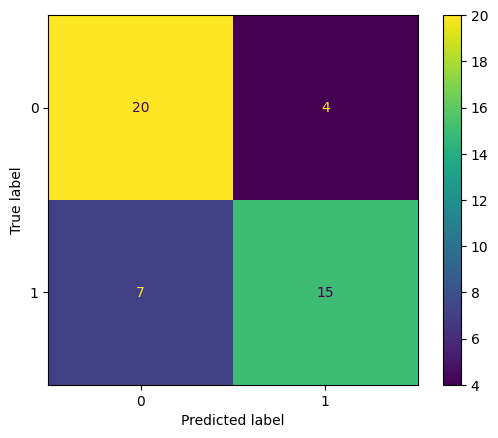

In [ ]:
reviews_of_lap_MEl1= reviews_of_lapd()
reviews_of_lap_MEl1.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl1.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  76.08695652173914
recall=  76.08695652173914
accuracy=  76.08695652173914
f1=  76.08695652173914


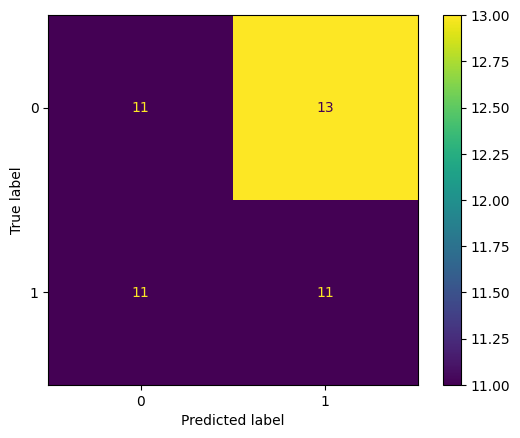

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl1.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Random Forest

Precision=  82.6086956521739
recall=  82.6086956521739
accuracy=  82.6086956521739
f1=  82.6086956521739


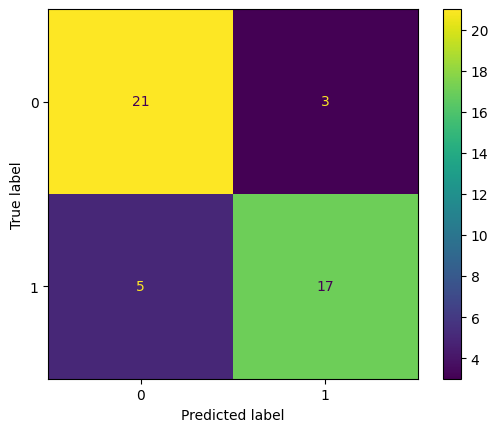

In [ ]:
reviews_of_lap_MEl2= reviews_of_laprd()
reviews_of_lap_MEl2.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl2.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  71.73913043478261
recall=  71.73913043478261
accuracy=  71.73913043478261
f1=  71.73913043478261


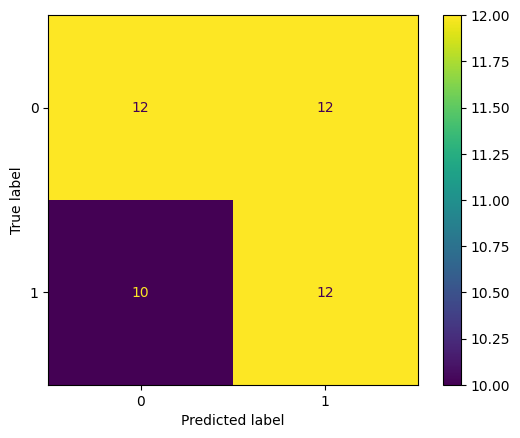

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl2.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### AdaBoost

Precision=  80.43478260869566
recall=  80.43478260869566
accuracy=  80.43478260869566
f1=  80.43478260869566


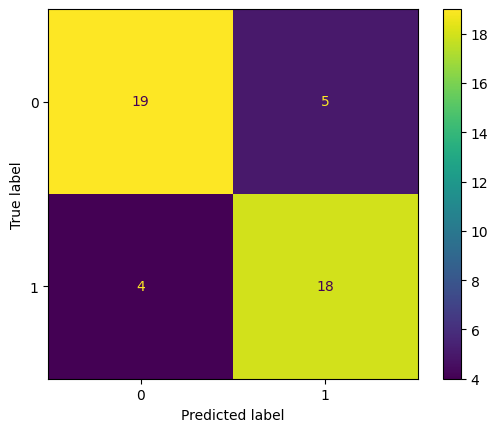

In [ ]:
reviews_of_lap_MEl3= reviews_of_lapabs()
reviews_of_lap_MEl3.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl3.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  76.08695652173914
recall=  76.08695652173914
accuracy=  76.08695652173914
f1=  76.08695652173914


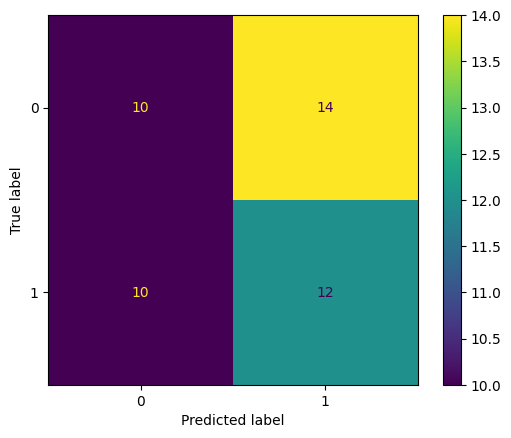

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl3.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Gradient Boosting classifiers

Precision=  86.95652173913044
recall=  86.95652173913044
accuracy=  86.95652173913044
f1=  86.95652173913044


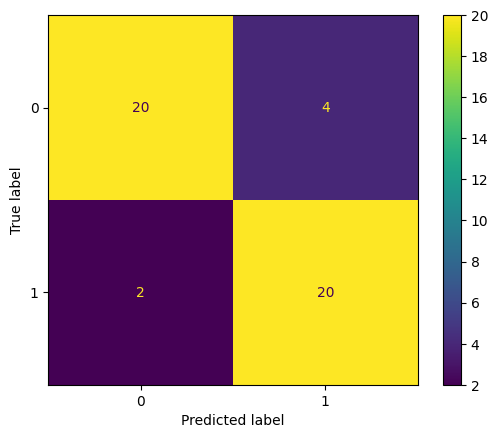

In [ ]:
reviews_of_lap_MEl4= reviews_of_lapgd()
reviews_of_lap_MEl4.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl4.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  69.56521739130434
recall=  69.56521739130434
accuracy=  69.56521739130434
f1=  69.56521739130434


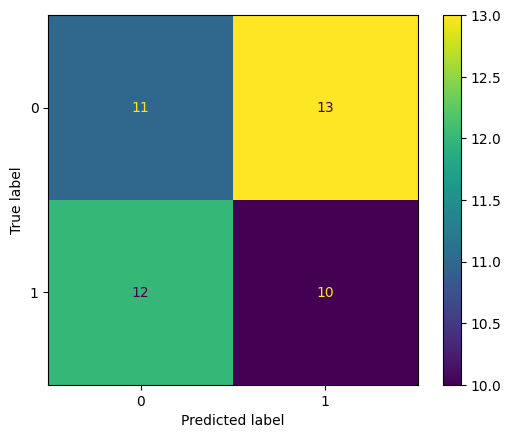

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl4.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Transformer

In [ ]:
import numpy as reviews_of_nmp
import tensorflow as reviews_of_tnsor
from tensorflow.keras.layers import Reshape as reviews_of_rshpe
from tensorflow.keras.layers import GlobalAveragePooling1D as reviews_of_gp1
from tensorflow.keras.models import Model as reviews_of_mdl
from tensorflow.keras.optimizers import Adamax as reviews_of_admx
from tensorflow.keras.layers import Input, Dense

r_unique = len(reviews_of_nmp.unique(reviews_of_lap['rating']))
r_ip_layer = Input(shape=(reviews_of_lap_xnn.shape[1],))

r_reshaped_ip = reviews_of_rshpe((reviews_of_lap_xnn.shape[1], 1))(r_ip_layer)

# Apply the Attention layer
r_attent = reviews_of_tnsor.keras.layers.Attention()([r_reshaped_ip, r_reshaped_ip])

r_reshap_attent = reviews_of_rshpe((-1, reviews_of_lap_xnn.shape[1]))(r_attent)

r_global_pool_lay = reviews_of_gp1()(r_reshap_attent)

r_op_layer = Dense(r_unique, activation='softmax')(r_global_pool_lay)

reviews_of_lap_MEl5 = reviews_of_mdl(inputs=r_ip_layer, outputs=r_op_layer)
reviews_of_lap_MEl5.compile(optimizer=reviews_of_admx(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
reviews_of_lap_MEl5.fit(reviews_of_lap_xnn, reviews_of_lap_ynn, epochs=10, batch_size=150, validation_data=(reviews_of_lap_xnn, reviews_of_lap_ynn))


Epoch 1/10
3/3 [==============================] - 1s 151ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 2/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 4/10
3/3 [==============================] - 0s 32ms/step - loss: 0.6930 - accuracy: 0.5326 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 5/10
3/3 [==============================] - 0s 25ms/step - loss: 0.6930 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.4946
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.4837 - val_loss: 0.6931 - val_accuracy: 0.5353
Epoch 8/10
3/3 [==========

2/2 [==============================] - 0s 6ms/step
Precision=  47.82608695652174
recall=  47.82608695652174
accuracy=  47.82608695652174
f1=  47.82608695652174


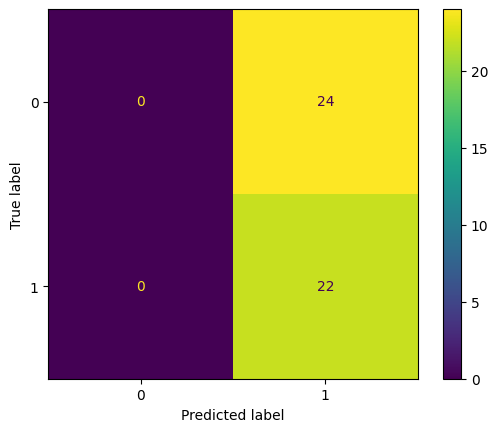

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xvv)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

2/2 [==============================] - 0s 5ms/step
Precision=  50.0
recall=  50.0
accuracy=  50.0
f1=  50.0


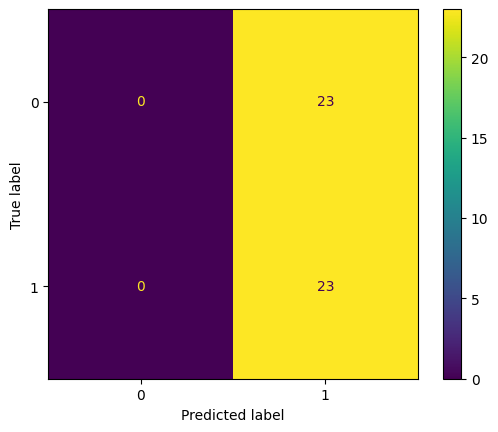

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xss)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yss,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### TabMLP

In [ ]:
# Convert data to PyTorch tensors
import torch as reviews_of_trch
import torch.nn as reviews_of_trchnn
import torch.optim as reviews_of_optim

reviews_of_lap_xnn = reviews_of_trch.tensor(reviews_of_lap_xnn, dtype=reviews_of_trch.float32)
reviews_of_lap_xvv = reviews_of_trch.tensor(reviews_of_lap_xvv, dtype=reviews_of_trch.float32)
reviews_of_lap_xss = reviews_of_trch.tensor(reviews_of_lap_xss, dtype=reviews_of_trch.float32)
reviews_of_lap_ynn = reviews_of_trch.tensor(reviews_of_lap_ynn.to_numpy(), dtype=reviews_of_trch.int64)
reviews_of_lap_yvv = reviews_of_trch.tensor(reviews_of_lap_yvv.values, dtype=reviews_of_trch.int64)
reviews_of_lap_yss = reviews_of_trch.tensor(reviews_of_lap_yss.values, dtype=reviews_of_trch.int64)

class Model_TabMLP(reviews_of_trchnn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super(Model_TabMLP, self).__init__()
        self.fc1 = reviews_of_trchnn.Linear(in_dim, hid_dim)
        self.relu = reviews_of_trchnn.ReLU()
        self.fc2 = reviews_of_trchnn.Linear(hid_dim, out_dim)

    def forward(self, rr):
        rr = self.fc1(rr)
        rr = self.relu(rr)
        rr = self.fc2(rr)
        return rr

in_dim = reviews_of_lap_xnn.shape[1]
hid_dim = 64
out_dim = 2

reviews_of_lap_MEl6 = Model_TabMLP(in_dim, hid_dim, out_dim)

# Define loss and optimizer
criterion = reviews_of_trchnn.CrossEntropyLoss()
optimizer = reviews_of_optim.Adamax(reviews_of_lap_MEl6.parameters(), lr=0.0001)

epoches_count = 20
for ep in range(epoches_count):
    optimizer.zero_grad()
    outputs = reviews_of_lap_MEl6(reviews_of_lap_xnn)
    loss = criterion(outputs, reviews_of_lap_ynn)
    loss.backward()
    optimizer.step()

In [ ]:

with reviews_of_trch.no_grad():
    out = reviews_of_lap_MEl6(reviews_of_lap_xvv)
    _, fld_out_MClass_R = reviews_of_trch.max(out, 1)

reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xvv)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  47.82608695652174
recall=  47.82608695652174
accuracy=  47.82608695652174
f1=  47.82608695652174


In [ ]:
with reviews_of_trch.no_grad():
    out = reviews_of_lap_MEl6(reviews_of_lap_xss)
    _, fld_out_MClass_R = reviews_of_trch.max(out, 1)

reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xss)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yss,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

Precision=  50.0
recall=  50.0
accuracy=  50.0
f1=  50.0
